In [2]:
import networkx as nx

import qiskit
from qiskit import Aer, IBMQ, execute
from qiskit.providers.aer import noise
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit import IBMQ, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import numpy as np
from qiskit.providers.aer.noise.errors import standard_errors as SE
from qiskit.providers.aer.noise.device import models 
from qiskit import wrapper as w
from qiskit import compile
IBMQ.enable_account('748089849db1196e7aaa73fc8df107837011ff226288a0b93b1759454af7d8ec04a3349871c55edfd9b74c556da28ecd0782060b5231c8c05f9c5e520ebc3c2d')
print("Available backends:")
IBMQ.backends()


Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [39]:
import json

device = IBMQ.get_backend('ibmq_16_melbourne')
properties = device.properties()
Config = json.load(open("Config.txt")) ##### Use this Noise Config
properties=properties.from_dict(Config)

In [40]:
device = IBMQ.get_backend('ibmq_16_melbourne')
coupling_map = device.configuration().coupling_map

gate_times = [
    ('u1', None, 0), ('u2', None, 100), ('u3', None, 200),
    ('cx', [1, 0], 678), ('cx', [1, 2], 547), ('cx', [2, 3], 721),
    ('cx', [4, 3], 733), ('cx', [4, 10], 721), ('cx', [5, 4], 800),
    ('cx', [5, 6], 800), ('cx', [5, 9], 895), ('cx', [6, 8], 895),
    ('cx', [7, 8], 640), ('cx', [9, 8], 895), ('cx', [9, 10], 800),
    ('cx', [11, 10], 721), ('cx', [11, 3], 634), ('cx', [12, 2], 773),
    ('cx', [13, 1], 2286), ('cx', [13, 12], 1504), ('cx', [], 800)
]

# Construct the noise model from backend properties
# and custom gate times
noise_model = noise.device.basic_device_noise_model(properties, gate_times=gate_times)

/home/swamit/anaconda3/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning
/home/swamit/anaconda3/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


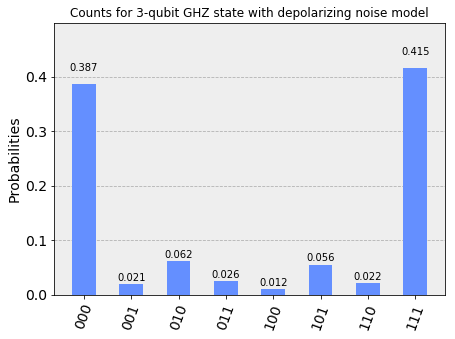

In [41]:
def createCirc_GHZ (n,circ_name):

    qr = QuantumRegister(n) # n qubits
    cr = ClassicalRegister(n)
    circ = QuantumCircuit(qr, cr, name = circ_name) # Create a quantum circuit object
    circ.h(qr[0])
    for i in range(n-1):
        circ.cx(qr[i], qr[i+1])
    
    circ.barrier()

    # Measurement
    for i in range(n):
        circ.measure(qr[i], cr[i])
    return circ

circ = createCirc_GHZ(3,'GHZ-3')

basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with depolarizing noise model")